In [507]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [508]:
img = cv2.imread('./test_images/Bale2.jpg')
img.shape

(612, 427, 3)

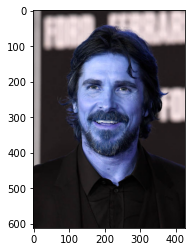

In [509]:
plt.imshow(img)

In [510]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

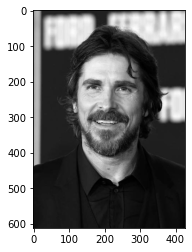

In [511]:
plt.imshow(gray_img, cmap = 'gray')

In [512]:
gray_img.shape

(612, 427)

In [513]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_img , 1.3, 5)
faces

array([[ 90, 125, 241, 241]])

In [514]:
x,y,w,h = faces[0]
x,y,w,h

(90, 125, 241, 241)

In [515]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

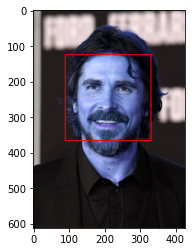

In [516]:
plt.imshow(face_img)

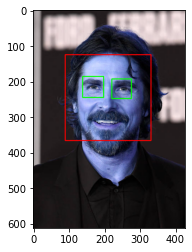

In [517]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_img[y:y+h, x:x+w] #region of interest
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

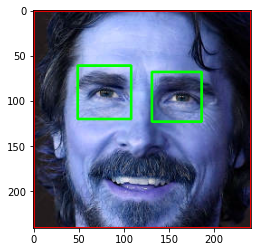

In [518]:
%matplotlib inline
plt.imshow(roi_color, cmap = 'gray')
plt.show()

In [519]:
#summing up into a function

def get_cropped_img(image_path):
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img,1.3,5)
    for (x,y,w,h) in faces :
        roi_gray = gray_img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
        if len(eyes) >= 2 :
            return roi_color

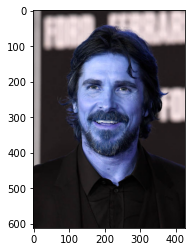

In [520]:
original_img = cv2.imread('./Test_images/Bale2.jpg')
plt.imshow(original_img)

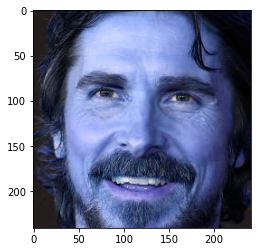

In [521]:
cropped_image = get_cropped_img('./Test_images/Bale2.jpg')
plt.imshow(cropped_image)

In [522]:
path_to_data =  "./dataset/"
path_to_cr_data = './dataset/cropped/'

In [523]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir() :
        img_dirs.append(entry.path)

In [524]:
img_dirs

['./dataset/Andrew garfield',
 './dataset/Benedict cumberbatch',
 './dataset/Christian bale',
 './dataset/Keane Reeves',
 './dataset/Leonardo dicaprio',
 './dataset/Robert downey jr']

In [525]:
import shutil
if os.path.exists(path_to_cr_data) :
    shutil.rmtree(path_to_cr_data)    #removing the folder if it exists
os.mkdir(path_to_cr_data)

In [526]:
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs :
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir) :
        roi_color = get_cropped_img(entry.path)
        if roi_color is not None :
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder) :
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print('Generating cropped images in folder: ', cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/Andrew garfield
Generating cropped images in folder:  ./dataset/cropped/Benedict cumberbatch
Generating cropped images in folder:  ./dataset/cropped/Christian bale
Generating cropped images in folder:  ./dataset/cropped/Keane Reeves
Generating cropped images in folder:  ./dataset/cropped/Leonardo dicaprio
Generating cropped images in folder:  ./dataset/cropped/Robert downey jr


In [528]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray) 
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


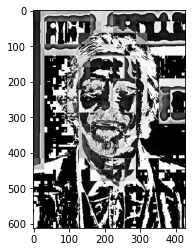

In [529]:
img = cv2.imread('./Test_images/Bale2.jpg')
im_har = w2d(img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [530]:
celebrity_file_names_dict

{'Andrew garfield': ['./dataset/cropped/Andrew garfield/Andrew garfield1.png',
  './dataset/cropped/Andrew garfield/Andrew garfield2.png',
  './dataset/cropped/Andrew garfield/Andrew garfield3.png',
  './dataset/cropped/Andrew garfield/Andrew garfield4.png',
  './dataset/cropped/Andrew garfield/Andrew garfield5.png',
  './dataset/cropped/Andrew garfield/Andrew garfield6.png',
  './dataset/cropped/Andrew garfield/Andrew garfield7.png',
  './dataset/cropped/Andrew garfield/Andrew garfield8.png',
  './dataset/cropped/Andrew garfield/Andrew garfield9.png',
  './dataset/cropped/Andrew garfield/Andrew garfield10.png',
  './dataset/cropped/Andrew garfield/Andrew garfield11.png',
  './dataset/cropped/Andrew garfield/Andrew garfield12.png',
  './dataset/cropped/Andrew garfield/Andrew garfield13.png',
  './dataset/cropped/Andrew garfield/Andrew garfield14.png',
  './dataset/cropped/Andrew garfield/Andrew garfield15.png',
  './dataset/cropped/Andrew garfield/Andrew garfield16.png',
  './dataset/c

In [534]:

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is not None:
            scaled_raw_image = cv2.resize(img, (32, 32))

In [535]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Andrew garfield': 0,
 'Benedict cumberbatch': 1,
 'Christian bale': 2,
 'Keane Reeves': 3,
 'Leonardo dicaprio': 4,
 'Robert downey jr': 5}

In [536]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items() :
    for training_image in training_files :
        img = cv2.imread(training_image)
        if img is None :
            continue
        resized_img = cv2.resize(img, (32,32))
        img_haar = w2d(img,'db1',5)
        resize_img_haar = cv2.resize(img_haar, (32,32))
        #vertically stacking two images 
        combined_img = np.vstack((resized_img.reshape(32*32*3,1), resize_img_haar.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [537]:
len(X)

271

In [538]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(271, 4096)

In [539]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


# Training Model

In [540]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [541]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [542]:
X_train.shape

(216, 4096)

In [543]:
X_test.shape

(55, 4096)

In [546]:
pipe_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 15))])
pipe_svc.fit(X_train, y_train)
pipe_svc.score(X_test, y_test)

0.7272727272727273

In [547]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [548]:
pipe_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(n_estimators=400,random_state =2))])
pipe_rf.fit(X_train, y_train)
pipe_rf.score(X_test, y_test)

0.6909090909090909

In [549]:
pipe_xg = Pipeline([('scaler', StandardScaler()), ('xgc', XGBClassifier())])
pipe_xg.fit(X_train, y_train)
pipe_xg.score(X_test, y_test)

0.6727272727272727

In [552]:
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000,solver='liblinear',multi_class='auto'))])
pipeline_lr.fit(X_train, y_train)
pipeline_lr.score(X_test, y_test)

0.8727272727272727

In [555]:
print(classification_report(y_test, pipeline_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.83      0.83      0.83         6
           2       0.91      0.91      0.91        11
           3       1.00      0.83      0.91         6
           4       0.92      0.79      0.85        14
           5       0.79      1.00      0.88        11

    accuracy                           0.87        55
   macro avg       0.88      0.87      0.87        55
weighted avg       0.88      0.87      0.87        55



In [556]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.pipeline import make_pipeline

In [559]:
#Gridsearch

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,500,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto', max_iter = 1000),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [566]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.759197,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.490909,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.763848,{'logisticregression__C': 1}


In [569]:
scores

[{'model': 'svm',
  'best_score': 0.7591966173361522,
  'best_params': {'svc__C': 1, 'svc__kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.4909090909090909,
  'best_params': {'randomforestclassifier__n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.7638477801268498,
  'best_params': {'logisticregression__C': 1}}]

In [570]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, max_iter=1000, solver='liblinear'))])}

In [571]:
best_estimators['svm'].score(X_test,y_test)

0.7818181818181819

In [572]:
best_estimators['random_forest'].score(X_test,y_test)

0.45454545454545453

In [573]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8727272727272727

In [575]:
best_clf = best_estimators['logistic_regression']

In [576]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  0,  0,  1],
       [ 0,  5,  0,  0,  0,  1],
       [ 0,  1, 10,  0,  0,  0],
       [ 0,  0,  0,  5,  1,  0],
       [ 1,  0,  1,  0, 11,  1],
       [ 0,  0,  0,  0,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

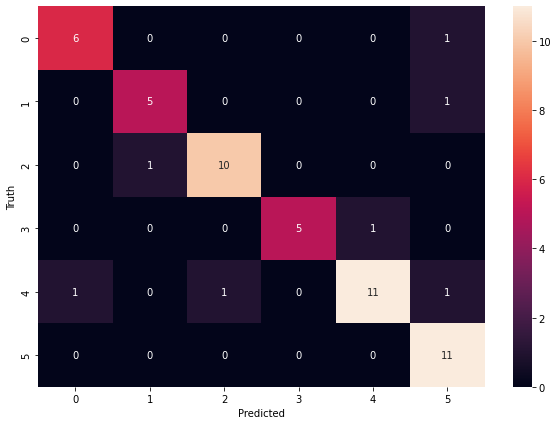

In [577]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [578]:
#installing joblib
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [579]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))